# Installation:
Run the subsequent cell

In [1]:
!pip -q install ./python

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Setup the Environment:

In [1]:
from unityagents import UnityEnvironment
import numpy as np
# please do not modify the line below
env = UnityEnvironment(file_name="Banana")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# Use the trained Agent

In [ ]:
# watch the agent
import torch
from agent import Agent
import torch
from collections import deque
score_list = []
agent = Agent(37,4,2, dueling = True)
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0  
# load the trained weights
agent.dqn_local.load_state_dict(torch.load('checkpoint2.pth'))
while True:
    #action = np.random.randint(action_size)        # select an action
    action = agent.act(state,0)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:  
        print(score)
        score_list.append(score)
        if len(score_list)> 100:
            break
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations[0]            # get the current state
        score = 0  
        

    
print("Score: {}".format(score))
import matplotlib.pyplot as plt
plt.plot(score_list)
plt.xlabel('Episode Number')
plt.ylabel('Yummy Banana Score')
plt.show()
env.close()
''''''

cpu
17.0
16.0
18.0
16.0
15.0
12.0
22.0
14.0
20.0
13.0
20.0
14.0
19.0
15.0
15.0
13.0
16.0
19.0
11.0
18.0
17.0
18.0
13.0
18.0
16.0
16.0
16.0
16.0
15.0
15.0
14.0
20.0
17.0
17.0
13.0
16.0
20.0
16.0
20.0
15.0
20.0
19.0
16.0
17.0
6.0
17.0
20.0
18.0
17.0
16.0
14.0
16.0
16.0
0.0
14.0
12.0
18.0
16.0
14.0
13.0
16.0
19.0
18.0
18.0
12.0
16.0
22.0
19.0
17.0
17.0
15.0
7.0
19.0
20.0
21.0
16.0
14.0
13.0
15.0
17.0
17.0
20.0
17.0
16.0
23.0
18.0
19.0
15.0
4.0
13.0


# Train your own Agent

cpu
Episode 596	Average Score: 13.51
Environment solved in 596 episodes!	Average Score: 13.51
Episode 767	Average Score: 14.09
Environment solved in 767 episodes!	Average Score: 14.09
Episode 799	Average Score: 14.59
Environment solved in 799 episodes!	Average Score: 14.59
Episode 947	Average Score: 15.09
Environment solved in 947 episodes!	Average Score: 15.09
Episode 974	Average Score: 15.61
Environment solved in 974 episodes!	Average Score: 15.61
Episode 1000	Average Score: 15.51


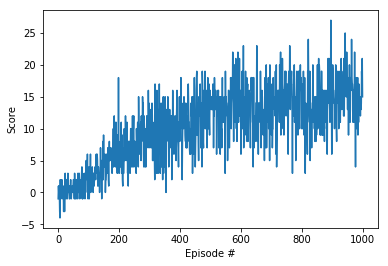

Episode 2000	Average Score: 15.02


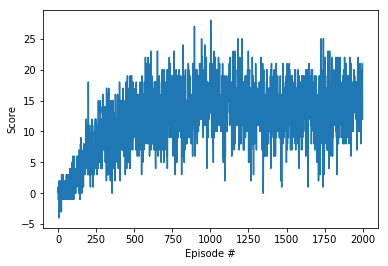

Episode 2726	Average Score: 16.13
Environment solved in 2726 episodes!	Average Score: 16.13
Episode 3000	Average Score: 15.60


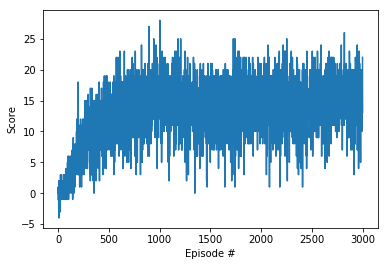

Episode 4000	Average Score: 13.69


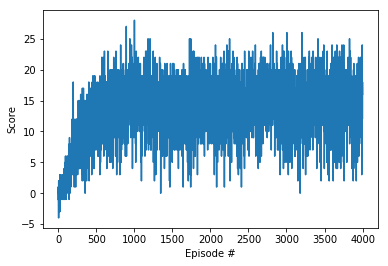

Episode 5000	Average Score: 14.89


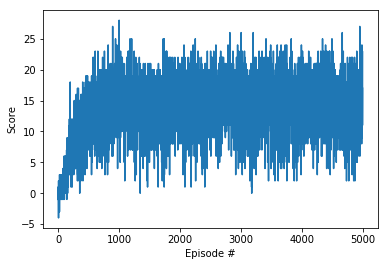

Episode 6000	Average Score: 13.91


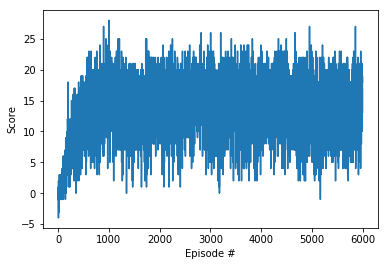

Episode 7000	Average Score: 15.09


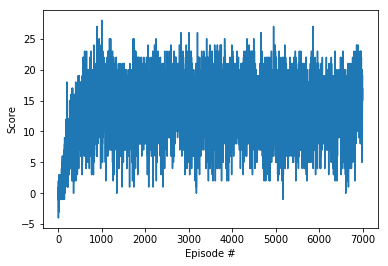

Episode 8000	Average Score: 16.12


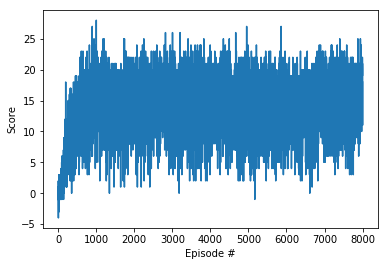

Episode 9000	Average Score: 13.93


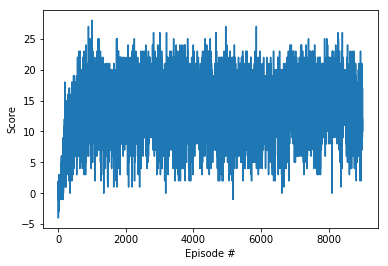

Episode 10000	Average Score: 14.32


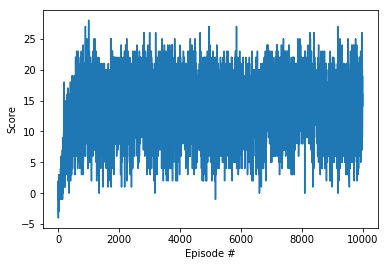

Episode 11000	Average Score: 11.32


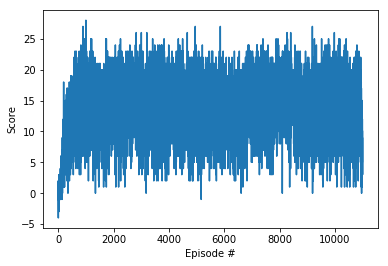

Episode 12000	Average Score: 15.23


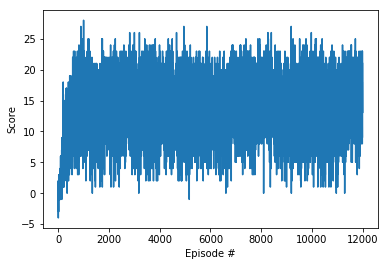

Episode 13000	Average Score: 15.11


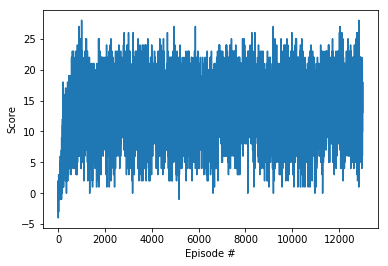

Episode 14000	Average Score: 14.64


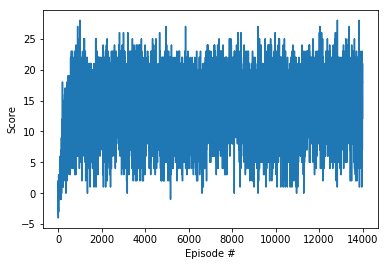

Episode 15000	Average Score: 15.57


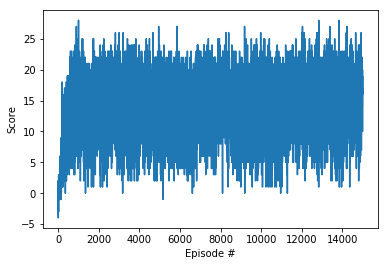

Episode 15661	Average Score: 16.68
Environment solved in 15661 episodes!	Average Score: 16.68
Episode 16000	Average Score: 15.62


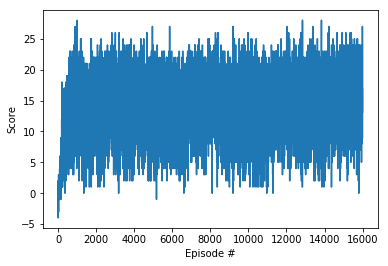

Episode 16695	Average Score: 14.32

KeyboardInterrupt: 

In [2]:
from agent import Agent
import torch
from collections import deque
%matplotlib inline 
# if dueling DQNs, dueling is True, if normal DQN, dueling is False
# if a GPU is available, it is automatically used 
agent = Agent(37,4,1, dueling = True)
max_score = 13
import matplotlib.pyplot as plt
def dqn(n_episodes=20000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    max_score = 13
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    #agent.dqn_local.load_state_dict(torch.load('checkpoint2.pth'))
    #agent.dqn_target.load_state_dict(torch.load('checkpoint2.pth'))
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0  
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 1000 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            fig = plt.figure()
            ax = fig.add_subplot(111)
            plt.plot(np.arange(len(scores)), scores)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
        if np.mean(scores_window) >= max_score + 0.5 :
            max_score = np.mean(scores_window)
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.dqn_local.state_dict(), 'checkpoint2.pth')

            
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
env.close()